In [37]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf

In [2]:
pip install pyarrow

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [5]:
startdate = '2010-01-01'
enddate = '2024-06-28'

df= yf.download('AAPL',start=startdate, end=enddate)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461977,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473148,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370185,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358408,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400681,447610800


In [6]:
pip install yfinance

In [7]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461977,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473148,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370185,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358408,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400681,447610800


In [8]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


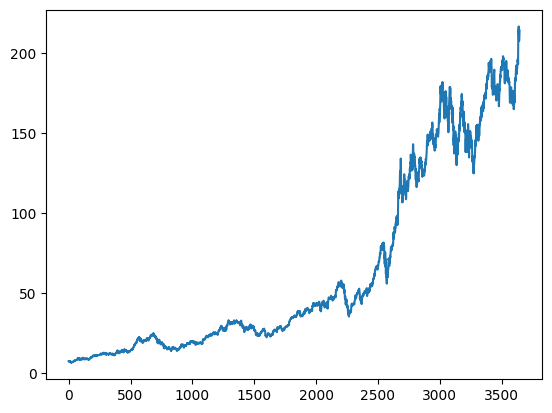

In [9]:
plt.plot(df.Close)

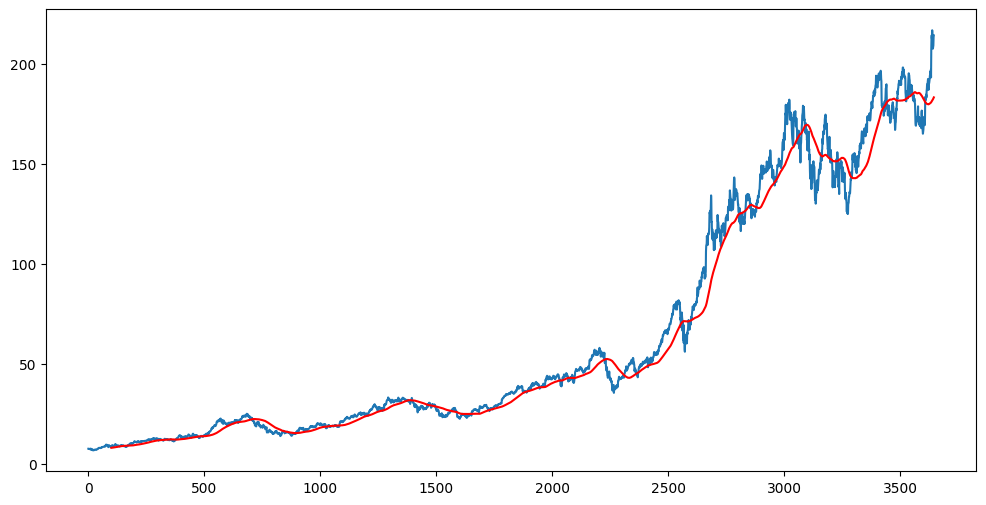

In [10]:
ma_100 = df.Close.rolling(100).mean()
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma_100,'r')

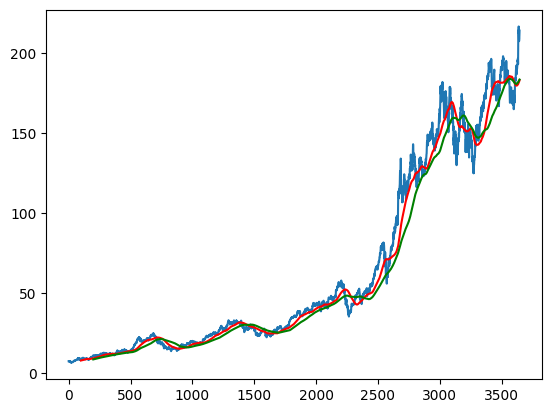

In [11]:
ma_200 = df.Close.rolling(200).mean()
plt.plot(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma_100,'r')
plt.plot(ma_200,'g')

In [12]:
df.shape

(3645, 5)

In [13]:
train_data=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
test_data=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

In [14]:
train_data.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [15]:
test_data.head()

,Close
2551,74.544998
2552,72.019997
2553,73.162498
2554,68.379997
2555,68.339996


In [16]:
train_data.shape

(2551, 1)

In [17]:
test_data.shape

(1094, 1)

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [19]:
pip install scikit-learn


     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     -------------------- ------------------- 30.7/60.8 kB ? eta -:--:--
     -------------------------------------- 60.8/60.8 kB 814.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.0 MB 4.5 MB/s eta 0:00:03
    --------------------------------------- 0.2/11.0 MB 2.5 MB/s eta 0:00:05
   - -------------------------------------- 0.4/11.0 MB 2.9 MB/s eta 0:00:04
   -- ------------------------------------- 0.7/11.0 MB 3.8 MB/s eta 0:00:03
   --- ------------------------------------ 0.9/11.0 MB 4.2 MB/s eta 0:00:03
   ----- ---------------------------------- 1.4/11.0 MB 5.1 MB/s eta 0:00:02
   ------ --------------------------------- 1.7/11.0 MB 5.3 MB/s eta 0:00:02
   ------ --------------------------------- 1.7/11.0 MB 5.3 MB/s eta 0:00:02
   ------- -------------------------------- 2.1/11.0 MB 5.2 MB/s eta 0:00:02
   ------- 

In [22]:
train_data_arr = scaler.fit_transform(train_data)
train_data_arr

array([[0.01046536],
       [0.01064169],
       [0.0090166 ],
       ...,
       [0.98805723],
       [0.97698183],
       [0.95279616]])

In [25]:
x_train = []
y_train = []
for i in range(100, train_data_arr.shape[0]):
    x_train.append(train_data_arr[i-100:i])
    y_train.append(train_data_arr[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [30]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [27]:
pip install keras

     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     --------------------------------- ---- 41.0/46.2 kB 653.6 kB/s eta 0:00:01
     -------------------------------------- 46.2/46.2 kB 765.3 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.1 MB 3.2 MB/s eta 0:00:01
   ------ --------------------------------- 0.2/1.1 MB 3.9 MB/s eta 0:00:01
   --------------- ------------------------ 0.4/1.1 MB 3.0 MB/s eta 0:00:01
   -------------------- ------------------- 0.6/1.1 MB 3.7 MB/s eta 0:00:01
   ----------------------------- ---------- 0.8/1.1 MB 3.8 MB/s eta 0:00:01
   ----------------------------- ---------- 0.8/1.1 MB 3.8 MB/s eta 0:00:01
   -------------------------------- ------- 0.9/1.1 MB 3.2 MB/s eta 0:00:01
   ---------------------------------- ----- 1.0/1.1 MB 2.9 MB/s eta 0:00:01
   ----------------------------------- ---- 1.0/1.1 MB 2.5 MB/s eta 0:00:01
   ------------

In [29]:
pip install tensorflow

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached wheel-0.43.0-py3-none-any.whl.metadata (2.2 kB)
   ---------------------------------------- 0.0/377.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/377.0 MB 1.5 MB/s eta 0:04:08
   ---------------------------------------- 0.2/377.0 MB 2.3 MB/s eta 0:02:45
   ---------------------------------------- 0.3/377.0 MB 2.9 MB/s eta 0:02:09
   ---------------------------------------- 0.5/377.0 MB 2.8 MB/s eta 0:02:15
   ---------------------------------------- 0.7/377.0 MB 3.9 MB/s eta 0:01:36
   ---------------------------------------- 0.7/377.0 MB 3.9 MB/s eta 0:01:36
   ---------------------------------------- 0.7/377.0 MB 3.9 MB/s et

In [40]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2))

# Add the second LSTM layer
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

# Add the third LSTM layer
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

# Add the fourth LSTM layer
model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(units=1))

In [41]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_7 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 32s 265ms/step - loss: 0.0364
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 20s 261ms/step - loss: 0.0050
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 21s 266ms/step - loss: 0.0039
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 20s 265ms/step - loss: 0.0035
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 20s 262ms/step - loss: 0.0033
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 20s 258ms/step - loss: 0.0038
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 20s 254ms/step - loss: 0.0032
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 20s 254ms/step - loss: 0.0028
Epoch 9/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 19s 249ms/step - loss: 0.0025
Epoch 10/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 19s 250ms/step - loss: 0.0025
Epoch 11/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 19s 246ms/step - loss: 0.0024
Epoch 12/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 19s 245ms/step - loss: 0.0020
Epoch 13/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 19s 249ms/step - loss: 0.0021
Epoch 14/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 19s 245ms/step - loss: 0.0022
Epoch 15/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 19s 

In [43]:
model.save('keras_model.h5')

In [44]:
test_data.tail(100)

,Close
3545,187.679993
3546,189.300003
3547,189.410004
3548,188.320007
3549,188.850006
...,...
3640,207.490005
3641,208.139999
3642,209.070007
3643,213.250000


In [46]:
pst_100_ds = train_data.tail(100)
final_df = pd.concat([pst_100_ds,test_data], ignore_index = True)
final_df.head(5)

,Close
0,55.992500
1,56.147499
2,54.740002
3,55.205002
4,56.752499


In [47]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.00773482],
       [0.00869201],
       [0.        ],
       ...,
       [0.9530662 ],
       [0.97887977],
       [0.98412899]])

In [48]:
input_data.shape

(1194, 1)

In [49]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
    

In [50]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1094, 100, 1)
(1094,)


In [51]:
y_predicted=model.predict(x_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step


In [52]:
y_predicted.shape

(1094, 1)

In [53]:
scaler.scale_

array([0.00617551])

In [54]:
scale_factor=1/0.00617551
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

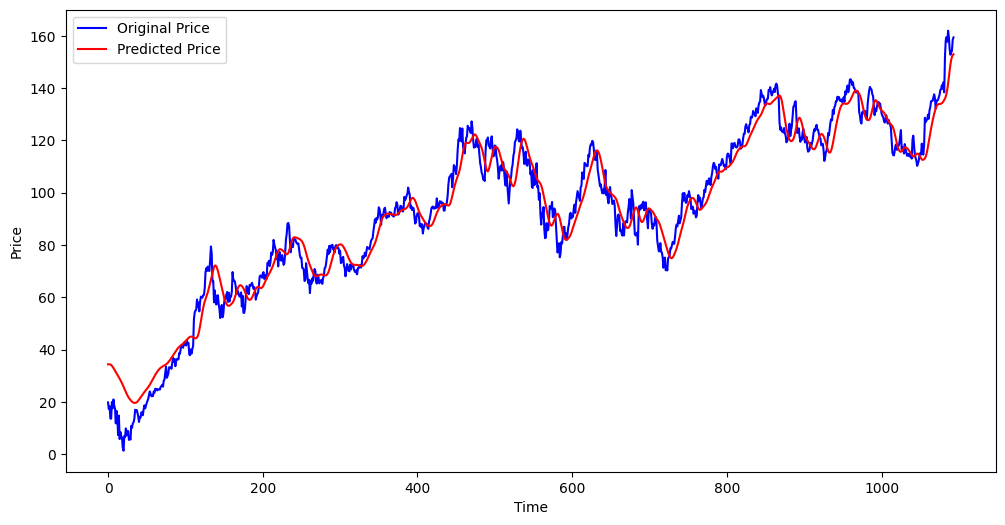

In [55]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()